### ML MODEL PREDICTION FOR MEDICAL COMPLICATION


In [2]:
#importing relevant libraries
import numpy as np
import pandas as pd



In [22]:
#LOADING THE UPLOADED CSV FILE 
data = pd.read_csv('C:\\Users\\ASUS\\Desktop\\FitFinity_EPICS_Project\\FITFINITY (Responses) - Form Responses 1.csv')
data.head()

,Timestamp,Name,Age,Gender,Type of Occupation\r\n\r\n,Activity Lifestyle,Stress Level,Medical / Health Complications,Health Complications 1,Health Complications 2,Health Complications 3,Health Complications
0,12/13/2022 23:37:07,Sangeeta,35,Female,Desk_Job,3,4,Back_Pain,Joints_Pain,NaN,NaN,Back_Pain Joints_Pain
1,12/14/2022 13:10:07,Manju Manojawas,49,Female,Household,4,4,Back_Pain,Joints_Pain,NaN,NaN,Back_Pain Joints_Pain
2,12/14/2022 20:46:02,Abhimanyu Manojawas,16,Male,Student,4,4,Healthy,NaN,NaN,NaN,Healthy
3,12/14/2022 20:48:04,Savitri,86,Female,Household,2,3,Back_Pain,Joints_Pain,Blood_Pressure,Eyes_related_issues,Back_Pain Joints_Pain Blood_Pressure Eyes_rela...
4,12/14/2022 20:52:43,Ankit Singh,20,Male,Student,6,3,Digestive_Problems,NaN,NaN,NaN,Digestive_Problems


In [23]:
data = data.drop('Timestamp',axis = 1)

In [24]:
data.head(10)

,Name,Age,Gender,Type of Occupation\r\n\r\n,Activity Lifestyle,Stress Level,Medical / Health Complications,Health Complications 1,Health Complications 2,Health Complications 3,Health Complications
0,Sangeeta,35,Female,Desk_Job,3,4,Back_Pain,Joints_Pain,NaN,NaN,Back_Pain Joints_Pain
1,Manju Manojawas,49,Female,Household,4,4,Back_Pain,Joints_Pain,NaN,NaN,Back_Pain Joints_Pain
2,Abhimanyu Manojawas,16,Male,Student,4,4,Healthy,NaN,NaN,NaN,Healthy
3,Savitri,86,Female,Household,2,3,Back_Pain,Joints_Pain,Blood_Pressure,Eyes_related_issues,Back_Pain Joints_Pain Blood_Pressure Eyes_rela...
4,Ankit Singh,20,Male,Student,6,3,Digestive_Problems,NaN,NaN,NaN,Digestive_Problems
5,Shashikala Pushkarna,70,Female,Household,6,4,Back_Pain,Joints_Pain,Blood_Pressure,Diabetes,Back_Pain Joints_Pain Blood_Pressure Diabetes
6,Satish Pushkarna,71,Male,retired,2,3,Back_Pain,Joints_Pain,Diabetes,Eyes_related_issues,Back_Pain Joints_Pain Diabetes Eyes_related_is...
7,Manojawas Elayath,58,Male,Field_Job,8,4,Back_Pain,Joints_Pain,Diabetes,Cardiovascular,Back_Pain Joints_Pain Diabetes Cardiovascular
8,knk sharma,79,Male,retired,2,3,Back_Pain,Joints_Pain,Blood_Pressure,Diabetes,Back_Pain Joints_Pain Blood_Pressure Diabetes
9,Mrs. Indira Sharma,71,Female,Household,5,4,Back_Pain,Joints_Pain,Diabetes,Eyes_related_issues,Back_Pain Joints_Pain Diabetes Eyes_related_is...


In [25]:
data = data.drop('Name ',axis = 1)
data.head()

,Age,Gender,Type of Occupation\r\n\r\n,Activity Lifestyle,Stress Level,Medical / Health Complications,Health Complications 1,Health Complications 2,Health Complications 3,Health Complications
0,35,Female,Desk_Job,3,4,Back_Pain,Joints_Pain,NaN,NaN,Back_Pain Joints_Pain
1,49,Female,Household,4,4,Back_Pain,Joints_Pain,NaN,NaN,Back_Pain Joints_Pain
2,16,Male,Student,4,4,Healthy,NaN,NaN,NaN,Healthy
3,86,Female,Household,2,3,Back_Pain,Joints_Pain,Blood_Pressure,Eyes_related_issues,Back_Pain Joints_Pain Blood_Pressure Eyes_rela...
4,20,Male,Student,6,3,Digestive_Problems,NaN,NaN,NaN,Digestive_Problems


In [26]:
# Change the column names
data.columns = ['Age', 'Gender', 'Type Of Occupation','Activity Lifestyle','Stress Level','medical','Health Complications 1','Health Complications 2','Health Complications 3','Health Complications']

In [27]:
data.head()


,Age,Gender,Type Of Occupation,Activity Lifestyle,Stress Level,medical,Health Complications 1,Health Complications 2,Health Complications 3,Health Complications
0,35,Female,Desk_Job,3,4,Back_Pain,Joints_Pain,NaN,NaN,Back_Pain Joints_Pain
1,49,Female,Household,4,4,Back_Pain,Joints_Pain,NaN,NaN,Back_Pain Joints_Pain
2,16,Male,Student,4,4,Healthy,NaN,NaN,NaN,Healthy
3,86,Female,Household,2,3,Back_Pain,Joints_Pain,Blood_Pressure,Eyes_related_issues,Back_Pain Joints_Pain Blood_Pressure Eyes_rela...
4,20,Male,Student,6,3,Digestive_Problems,NaN,NaN,NaN,Digestive_Problems


In [28]:
data.shape

(194, 10)

In [29]:
# Calculate some basic statistics for the numerical columns
print(data[['Age', 'Stress Level', 'Activity Lifestyle']].describe())

              Age  Stress Level  Activity Lifestyle
count  194.000000    194.000000          194.000000
mean    37.108247      3.072165            5.175258
std     16.834262      1.108118            2.474786
min     16.000000      1.000000            0.000000
25%     21.000000      2.000000            3.000000
50%     34.000000      3.000000            5.000000
75%     48.000000      4.000000            7.000000
max     93.000000      5.000000           10.000000


In [30]:
bins = [0,20,40,60,np.inf]
labels = ['Child','Youth','Adult','Old-Age']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [31]:
data.head()

,Age,Gender,Type Of Occupation,Activity Lifestyle,Stress Level,medical,Health Complications 1,Health Complications 2,Health Complications 3,Health Complications,AgeGroup
0,35,Female,Desk_Job,3,4,Back_Pain,Joints_Pain,NaN,NaN,Back_Pain Joints_Pain,Youth
1,49,Female,Household,4,4,Back_Pain,Joints_Pain,NaN,NaN,Back_Pain Joints_Pain,Adult
2,16,Male,Student,4,4,Healthy,NaN,NaN,NaN,Healthy,Child
3,86,Female,Household,2,3,Back_Pain,Joints_Pain,Blood_Pressure,Eyes_related_issues,Back_Pain Joints_Pain Blood_Pressure Eyes_rela...,Old-Age
4,20,Male,Student,6,3,Digestive_Problems,NaN,NaN,NaN,Digestive_Problems,Youth


In [32]:
data = data.drop(data.columns[6:9],axis = 1)

In [33]:
data.head()

,Age,Gender,Type Of Occupation,Activity Lifestyle,Stress Level,medical,Health Complications,AgeGroup
0,35,Female,Desk_Job,3,4,Back_Pain,Back_Pain Joints_Pain,Youth
1,49,Female,Household,4,4,Back_Pain,Back_Pain Joints_Pain,Adult
2,16,Male,Student,4,4,Healthy,Healthy,Child
3,86,Female,Household,2,3,Back_Pain,Back_Pain Joints_Pain Blood_Pressure Eyes_rela...,Old-Age
4,20,Male,Student,6,3,Digestive_Problems,Digestive_Problems,Youth


In [35]:
data = data.drop('medical',axis = 1)

In [36]:
data.head()

,Age,Gender,Type Of Occupation,Activity Lifestyle,Stress Level,Health Complications,AgeGroup
0,35,Female,Desk_Job,3,4,Back_Pain Joints_Pain,Youth
1,49,Female,Household,4,4,Back_Pain Joints_Pain,Adult
2,16,Male,Student,4,4,Healthy,Child
3,86,Female,Household,2,3,Back_Pain Joints_Pain Blood_Pressure Eyes_rela...,Old-Age
4,20,Male,Student,6,3,Digestive_Problems,Youth


In [38]:
data.shape

(194, 7)

In [39]:
# Count the number of unique values in the age group column
print(data['AgeGroup'].value_counts())

AgeGroup
Youth      106
Adult       56
Old-Age     20
Child       12
Name: count, dtype: int64


In [40]:
# Group the data by occupation and calculate the mean stress level for each group
occupation_groups = data.groupby('Type Of Occupation')
mean_stress_by_occupation = occupation_groups['Stress Level'].mean()
print(mean_stress_by_occupation)

Type Of Occupation
Desk_Job     3.058824
Field_Job    3.057143
Household    2.972973
Singer       1.000000
Student      2.826087
Student      3.631579
Teacher      3.666667
retired      3.166667
retired      3.000000
Name: Stress Level, dtype: float64


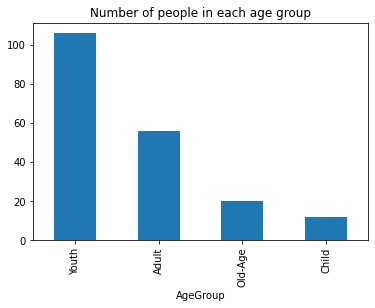

In [41]:
import matplotlib.pyplot as plt

# Create a bar chart showing the number of people in each age group
age_counts = data['AgeGroup'].value_counts()
age_counts.plot(kind='bar', title='Number of people in each age group')
plt.show()

In [43]:
# Group the data by occupation and calculate the mean ACTIVITY LIFESTYLE for each group
occupation_groups = data.groupby('Type Of Occupation')
mean_actl_by_occupation = occupation_groups['Activity Lifestyle'].mean()
print(mean_actl_by_occupation)

Type Of Occupation
Desk_Job      4.882353
Field_Job     6.142857
Household     5.000000
Singer       10.000000
Student       5.478261
Student       4.894737
Teacher       6.333333
retired       2.666667
retired       4.000000
Name: Activity Lifestyle, dtype: float64


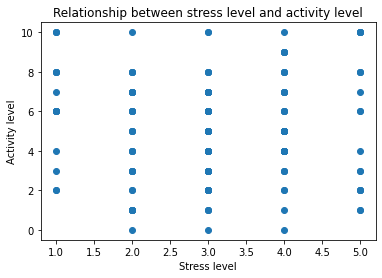

In [44]:
# Create a scatter plot showing the relationship between stress level and activity level
plt.scatter(data['Stress Level'], data['Activity Lifestyle'])
plt.xlabel('Stress level')
plt.ylabel('Activity level')
plt.title('Relationship between stress level and activity level')
plt.show()

In [45]:
# Group the data by gender and calculate the mean stress level for each group
gender_groups = data.groupby('Gender')
mean_stress_by_Gender = gender_groups['Stress Level'].mean()
print(mean_stress_by_Gender)

Gender
Female    3.180556
Male      3.008264
Male      3.000000
Name: Stress Level, dtype: float64


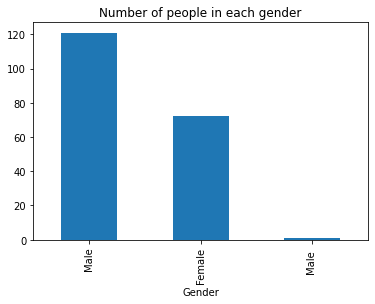

In [46]:
# Create a bar chart showing the number of people in distinct gender
age_counts = data['Gender'].value_counts()
age_counts.plot(kind='bar', title='Number of people in each gender')
plt.show()

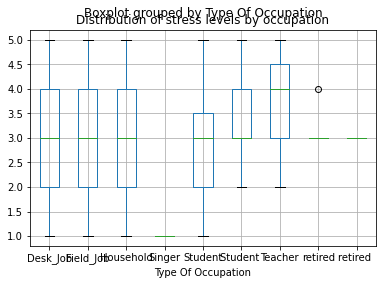

In [48]:
# Create a box plot showing the distribution of stress levels by occupation
data.boxplot(column='Stress Level', by='Type Of Occupation')
plt.title('Distribution of stress levels by occupation')
plt.show()

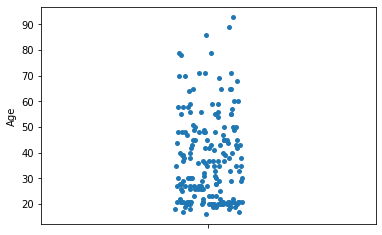

In [50]:
import seaborn as sns
x=data['Age']
y=data['Stress Level']
ax = sns.stripplot(x)

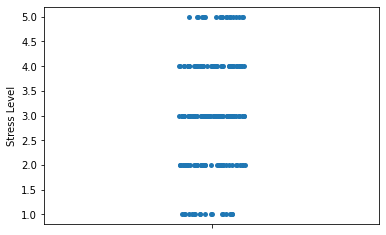

In [52]:
y=data['Stress Level']
ax = sns.stripplot(y)

<AxesSubplot:>

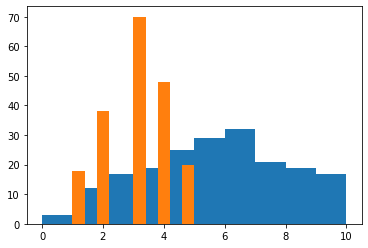

In [53]:
data['Activity Lifestyle'].hist(grid = False)
data['Stress Level'].hist(grid = False)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


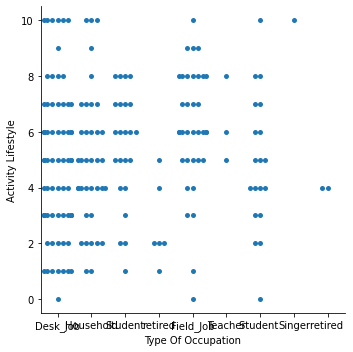

In [55]:
sns.catplot(data = data, x='Type Of Occupation' , y='Activity Lifestyle',kind = 'swarm')

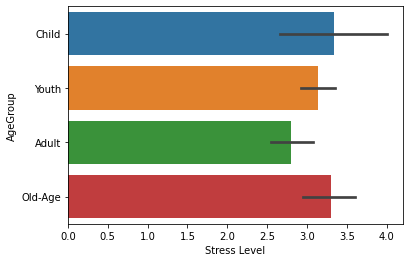

In [60]:
ax = sns.barplot(x='Stress Level',y='AgeGroup',data = data)

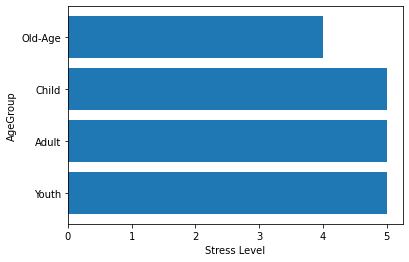

In [61]:
x=data['Stress Level']
y=data['AgeGroup']
plt.xlabel("Stress Level")
plt.ylabel("AgeGroup")
plt.barh(y,x)
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


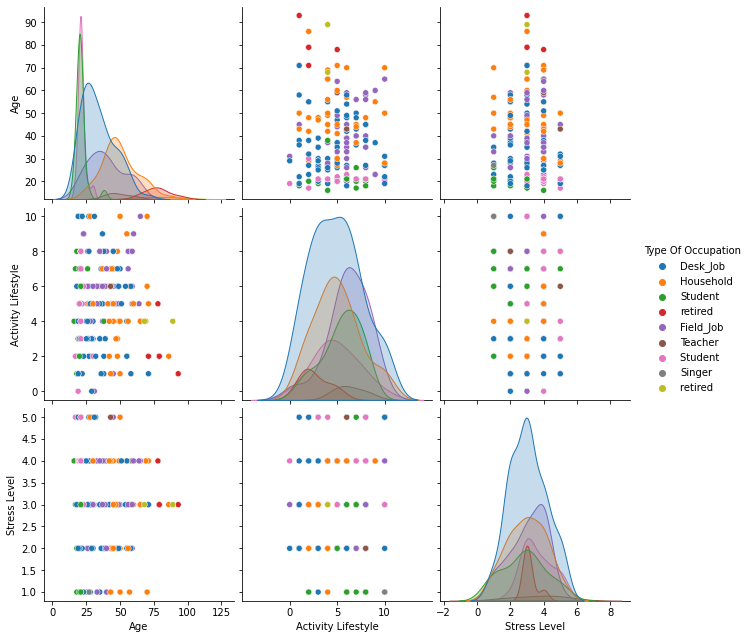

In [66]:
sns.pairplot(data,hue='Type Of Occupation',size=3)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


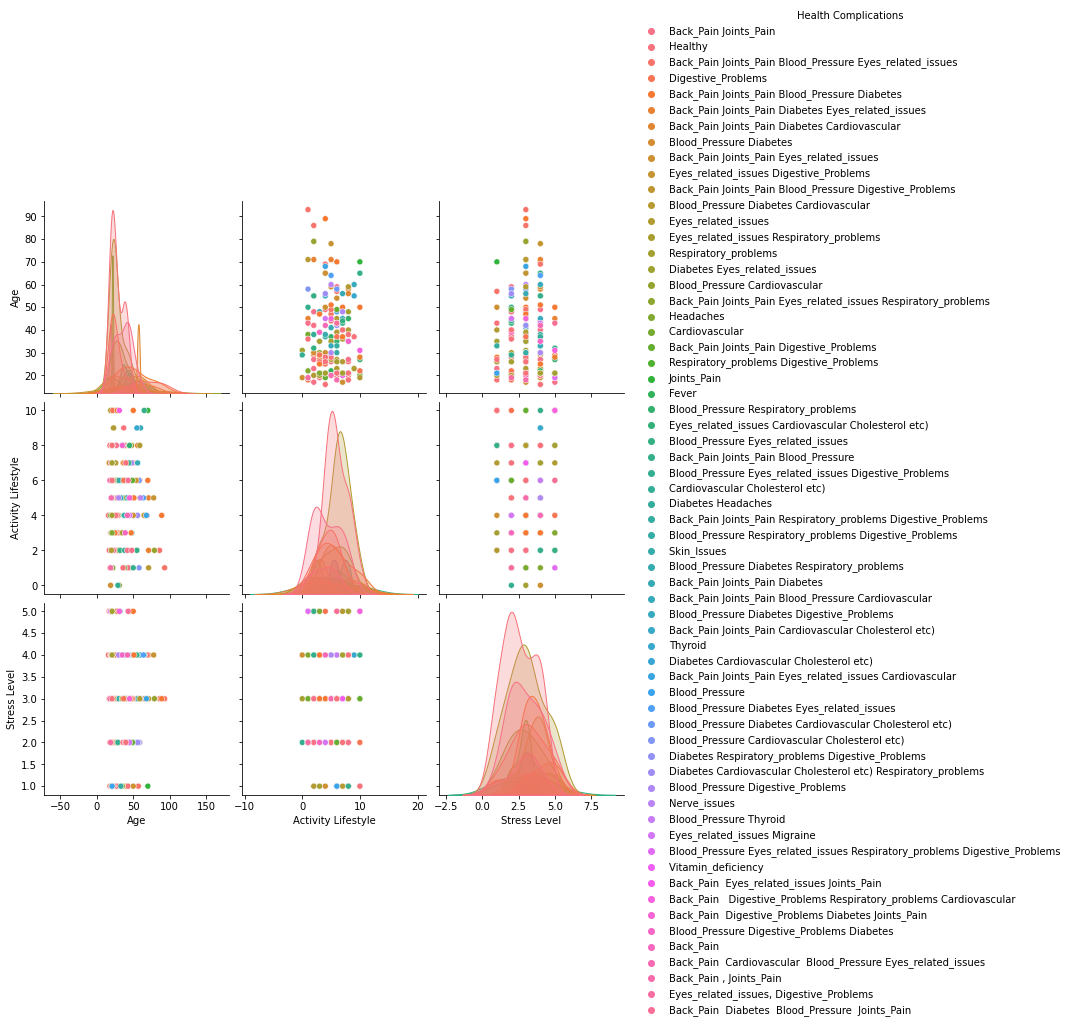

In [68]:
sns.pairplot(data,hue='Health Complications',size=3)